In [176]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [177]:
# preprocess data
df = pd.read_csv('../data/Hitters.csv')
df = df.replace('?', np.nan) # assume ? is na value
full_df = df # df without dropped values, bad stuff should only in salary
df = df.dropna()
qual = ['League', 'Division', 'NewLeague']

for q in qual:
    vals = df[q].unique()
    df.loc[:, [q]] = df[q].map({key: index for index, key in enumerate(vals)})

<ipython-input-177-231beab2c1b3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, [q]] = df[q].map({key: index for index, key in enumerate(vals)})
<ipython-input-177-231beab2c1b3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, [q]] = df[q].map({key: index for index, key in enumerate(vals)})
<ipython-input-177-231beab2c1b3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [182]:
# set the variables you want to use
y = df['Salary']
X = df.drop(['Salary'], axis=1).astype('float64')

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
center = y_train.mean()
y_train -= center

In [197]:
N = 200

penalties = np.linspace(0, 100000, N)

corrs = np.zeros(N)
coeffs = np.zeros(N)
# bad_corrs = np.zeros(N)

for i in range(N):
    lam = penalties[i]
    
    model = sm.OLS(y_train, X_train).fit_regularized(alpha=lam, L1_wt=0)
    pred = model.predict(X_test) + center
    if i==N-1:print(model.params)
    data = np.vstack((pred, y_test))
    
    # res = ((pred - pred.mean()) / pred.std()) * (y_test - y_test.mean()) / y_test.std()
    # res = res.sum() / (pred.shape[0] - 1) # subtract one for sample corr
    # bad_corrs[i] = res * res # testing to see what what corrcoefs does, adjusts for sampling

    corr_mat = np.corrcoef(data)
    corr = corr_mat[0, 1]
    corrs[i] = corr 
    
    # below i commented out wrong code
    # ss_res = ((y_test - pred)**2).sum()
    # ess + rss = tss only in OLS not regression 
    # ss_ess = ((pred - pred.mean())**2).sum()
    # r2 = ss_ess / ss_tss
    # below is not useful cause this isn't OLS, so r^2 is not equal to pearson correlation coeff^2
    # ss_tss = ((y_test - y_test.mean())**2).sum()
    # r2 = 1 - ss_res / ss_tss
    # coeffs[i] = r2

[-0.13685815 -0.01903905  0.00121452 -0.00754971 -0.00772053 -0.00988253
 -0.00363847  0.00445238  0.08798627  0.03650483  0.07462998  0.09402311
  0.01070525 -0.00052687 -0.00014004  0.08721822 -0.06569858 -0.00687542
 -0.00061254]


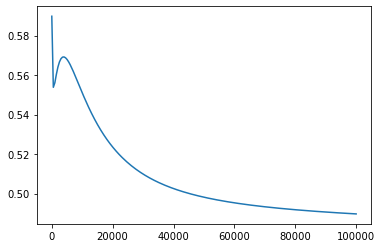

In [198]:
plt.plot(penalties, corrs)